# 글 부정글정 나누기

<ipython-input-5-3cf323db024f>:37: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = './chromedriver.exe')
<ipython-input-5-3cf323db024f>:13: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li['+str(i)+']/div/div[2]/a').click()
<ipython-input-5-3cf323db024f>:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  content = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]').text


포탈 :  1712
긍정 :  989
부정 :  680
중립 :  43


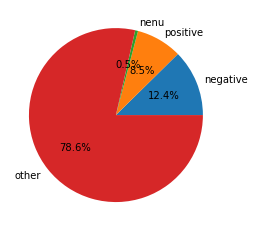

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="3df87a8fb48a98746df92c1e557633c1")>>

In [5]:
from selenium import webdriver
import time
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt

def getContents(url):
   
    driver.get(url)
    contents = ''
    for i in range(1,8):
        time.sleep(3)
        driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li['+str(i)+']/div/div[2]/a').click()
        time.sleep(3)
        content = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]').text
        contents += content
        driver.back()
    return contents

def wordSearch(fileName):
    file = open(fileName, 'r', encoding='utf-8')

    readFile = file.read()
    readFile = readFile.replace('\n', ' ')
    readFile = readFile.split(' ')
    # print(readFile)

    words = []
    for word in readFile:
        if word not in words:
            words.append(word)

    file.close()
    return words

m = Mecab('C:\\mecab\\mecab-ko-dic')
driver = webdriver.Chrome(executable_path = './chromedriver.exe')
url = "https://www1.president.go.kr/petitions/?c=37&only=1&page=1&order=1"
contents = getContents(url)
negativeWords = wordSearch('부정.txt')
positiveWords = wordSearch('긍정.txt')
nenuWords = wordSearch('중립.txt')

neSum = 0
poSum = 0
nenuSum = 0
for word in contents:
    if word in negativeWords:
        neSum += 1
    if word in positiveWords:
        poSum += 1
    if word in nenuWords:
        nenuSum += 1

print("포탈 : " , (neSum + poSum + nenuSum))
print("긍정 : " , neSum)
print("부정 : " , poSum)
print("중립 : ", nenuSum)

pieData = []
pieData.append(neSum)
pieData.append(poSum)
pieData.append(nenuSum)
pieData.append(len(contents) - (neSum + poSum + nenuSum))
labels = ['negative', 'positive', 'nenu', 'other']

plt.pie(pieData, labels = labels, autopct="%.1f%%")
plt.show()




driver.close